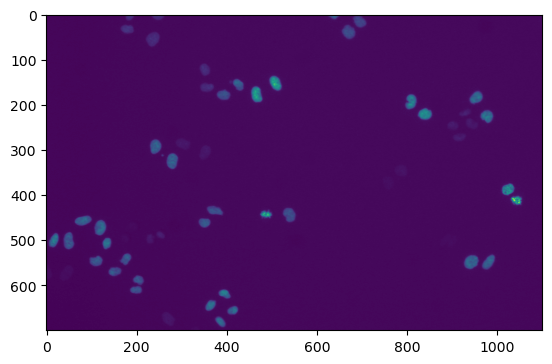

In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

a = np.array(Image.open("Fluo-N2DL-HeLa_t010.tif"))

plt.imshow(a)

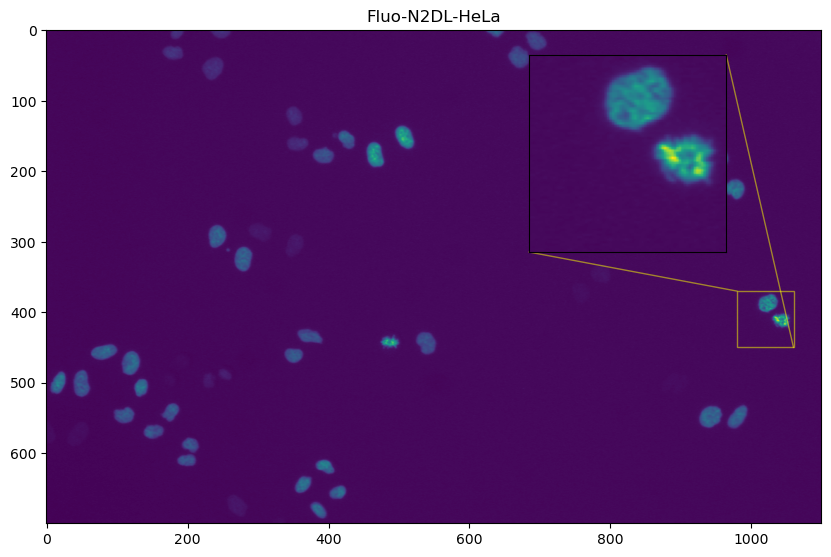

In [54]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# load your image
a = np.array(Image.open("Fluo-N2DL-HeLa_t010.tif"))

h, w = a.shape[:2]   # image height, width

fig, ax = plt.subplots(figsize=(10, 7))

# main image
ax.imshow(a, origin="upper")   # default orientation
ax.set_title("Fluo-N2DL-HeLa")

# --- define bottom-right region (in data coords) ---
side = 80                      # size of zoomed square in pixels
x1, x2 = w - side - 40, w - 40
y1, y2 = h - side - 250, h - 250

# inset Axes...
axins = ax.inset_axes([0.55, 0.55, 0.4, 0.4])  # [left, bottom, width, height] in axes fraction
axins.imshow(a, origin="upper")

# set the zoomed region
axins.set_xlim(x1, x2)
# because origin="upper", y increases downward → invert limits for correct display
axins.set_ylim(y2, y1)

axins.set_xticks([])
axins.set_yticks([])

# draw connecting box & lines
ax.indicate_inset_zoom(axins, edgecolor="yellow")

fig.savefig("Fluo-N2DL-HeLa.pdf")